In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

import vectfit as m

### Function vectfit

In [2]:
# construting signal
Ns = 101
s = np.linspace(3., 7., Ns)
poles = [5.0+0.1j, 5.0-0.1j]
residues = [[0.5-11.0j, 0.5+11.0j],
            [1.5-20.0j, 1.5+20.0j]]
f = m.evaluate(s, poles, residues)
weight = 1.0/f
poles_init = [3.5 + 0.035j, 3.5 - 0.035j]

# run vector fitting
# single iteration
poles_fit, residues_fit, cf, f_fit, rms = m.vectfit(f, s, poles_init, weight)

# rms error
rms

9.619933845662216e-11

In [3]:
### evaluate at finer points
s_test = np.linspace(3., 7., 5*Ns)
f_test = m.evaluate(s_test, poles, residues, cf)

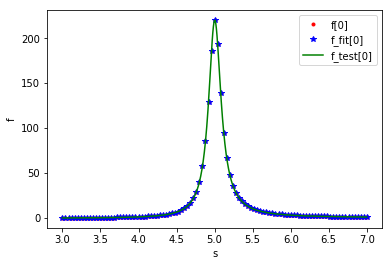

In [4]:
# plot
plt.plot(s, f[0], 'r.', label='f[0]')
plt.plot(s, f_fit[0], 'b*', label='f_fit[0]')
plt.plot(s_test, f_test[0], 'g', label='f_test[0]')
plt.xlabel('s')
plt.ylabel('f')
plt.legend()
plt.show()

### Large problem

In [5]:
Ns = 50000
N = 1000
s = np.linspace(1.e-2, 5.e3, Ns)
poles = np.linspace(1.1e-2, 4.8e+3, N/2);
poles = poles + poles*0.01j
poles = np.sort(np.append(poles, np.conj(poles)))
residues = np.linspace(1e+2, 1e+6, N/2);
residues = residues + residues*0.5j
residues = np.sort(np.append(residues, np.conj(residues)))
residues = residues.reshape((1, N))
f = np.zeros((1, Ns))
for p, r in zip(poles, residues[0]):
    f[0] += (r/(s - p)).real
weight = 1.0/f

poles_init = np.linspace(1.2e-2, 4.7e+3, N/2);
poles_init = poles_init + poles_init*0.01j
poles_init = np.sort(np.append(poles_init, np.conj(poles_init)))

In [6]:
%time poles_fit, residues_fit, cf, f_fit, rms = m.vectfit(f, s, poles_init, weight)
rms

CPU times: user 4min 14s, sys: 6min 42s, total: 10min 57s
Wall time: 2min 51s


0.005450713259715198

In [7]:
np.testing.assert_allclose(f, f_fit, 1e-2)